<a href="https://www.kaggle.com/code/notsau/german-traffic-sign-classification-with-dl?scriptVersionId=161449374" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# Data Çekme

In [3]:
#eğitim fotograflarini csy dosyasiyla birlestirme
import os
import cv2
import pandas as pd

csv_path = "/kaggle/input/gtsrb-german-traffic-sign/Train.csv"
image_folder = "/kaggle/input/gtsrb-german-traffic-sign"
train_images = []

data = pd.read_csv(csv_path)

for index, row in data.iterrows():
    image_path = os.path.join(image_folder, row["Path"])
    if os.path.exists(image_path) and image_path.endswith(".png"):
        try:
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                train_images.append(image)
            else:
                print(f"Error reading image: {image_path}")
        except Exception as e:
            print(f"Error processing image: {image_path}")
            print(e)
    else:
        print(f"Image not found or not a PNG file: {image_path}")

In [4]:
csv_path = "/kaggle/input/gtsrb-german-traffic-sign/Train.csv"

# Veri çerçevesini oku
data = pd.read_csv(csv_path)

# Train etiketlerini al
train_labels = data["ClassId"].values

print(train_labels)

[20 20 20 ... 42 42 42]


In [5]:
#test fotograflarini csy dosyasiyla birlestirme
csv_path = "/kaggle/input/gtsrb-german-traffic-sign/Test.csv"
image_folder = "/kaggle/input/gtsrb-german-traffic-sign"
test_images = []

data = pd.read_csv(csv_path)

for index, row in data.iterrows():
    image_path = os.path.join(image_folder, row["Path"])
    if os.path.exists(image_path) and image_path.endswith(".png"):
        try:
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                test_images.append(image)  
            else:
                print(f"Error reading image: {image_path}")
        except Exception as e:
            print(f"Error processing image: {image_path}")
            print(e)
    else:
        print(f"Image not found or not a PNG file: {image_path}")

In [6]:
csv_path = "/kaggle/input/gtsrb-german-traffic-sign/Test.csv"

# Veri çerçevesini oku
data = pd.read_csv(csv_path)

# test etiketlerini al
test_labels = data["ClassId"].values

print(test_labels)

[16  1 38 ...  6  7 10]


In [ ]:
test_images
#imagesler istedigimiz formata geldi

# Görselleştirme

In [8]:
import matplotlib.pyplot as plt
#resimleri görmek için matplotlib yükledik

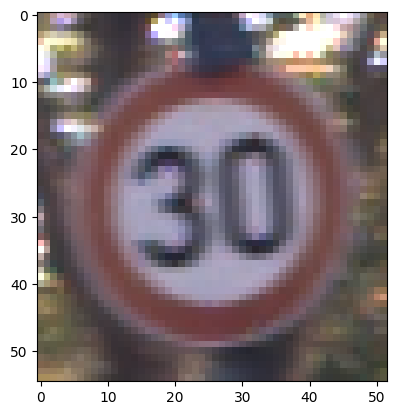

In [9]:
plt.imshow(train_images[643],cmap="gray")
#644. resim bunu alttaki koddan da görebiliriz

In [10]:
#görüntüleri ayni boyuta indirmek icin

import cv2
import numpy as np

rtrain_images = []
rtrain_labels = []
target_size = (41, 41)  # Hedef boyut

for image, label in zip(train_images, train_labels):
    height, width = image.shape[:2]
    if height != target_size[0] or width != target_size[1]:
        rtrain_image = cv2.resize(image, target_size)
    else:
        rtrain_image = image.copy()
    rtrain_images.append(rtrain_image)
    rtrain_labels.append(label)

rtrain_images = np.array(rtrain_images)
rtrain_labels = np.array(rtrain_labels)

In [11]:
#görüntüleri ayni boyuta indirmek icin

rtest_images = []
rtest_labels = []
target_size = (41, 41)  # Hedef boyut

for image, label in zip(test_images, test_labels):
    height, width = image.shape[:2]
    if height != target_size[0] or width != target_size[1]:
        rtest_image = cv2.resize(image, target_size)
    else:
        rtest_image = image.copy()
    rtest_images.append(rtest_image)
    rtest_labels.append(label)

rtest_images = np.array(rtest_images)
rtest_labels = np.array(rtest_labels)
print(rtest_images.shape)
print(rtest_labels.shape)


(12630, 41, 41, 3)
(12630,)


# Normalize Etmek

In [12]:
rtrain_images = rtrain_images/255.0
rtest_images = rtest_images/255.0
#verimizi 255'e bölersek 0-1 arasında kodlar olmuş olacak yani normalize etmiş olacağız.

In [13]:
rtest_images[0].shape

(41, 41, 3)

# Deep Learning

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,InputLayer,Reshape

In [15]:
from tensorflow.keras.layers import Dropout
model = Sequential()  # Yeni bir Sequential modeli oluşturuyoruz.

model.add(InputLayer(input_shape=(41, 41, 3)))  # Giriş boyutunu belirtiyoruz. 41x41 piksel boyutunda 3 kanallı bir görüntüyü kabul edecek.

model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu'))  # 12 filtreli 3x3 boyutunda bir Convolutional Layer ekliyoruz. Aktivasyon fonksiyonu olarak ReLU kullanıyoruz.

model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 boyutunda Max Pooling işlemi uyguluyoruz.

model.add(Flatten())  # Gelen çıktıyı düzleştiriyoruz, yani tek boyutlu hale getiriyoruz.

model.add(Dropout(0.5))  # 0.5 dropout oranıyla Dropout katmanı ekliyoruz. Dropout, overfitting'i azaltmak için kullanılır.

model.add(Dense(43))  # 43 nörona sahip tam bağlantılı (fully connected) bir katman ekliyoruz.

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
# Modeli derliyoruz. Kayıp fonksiyonu olarak Sparse Categorical Crossentropy kullanıyoruz. from_logits=True, çıkışların logit değerler olduğunu belirtir.
# Optimizasyon algoritması olarak Adam kullanıyoruz ve doğruluk metriğini kullanarak modeli değerlendireceğiz.

In [16]:
history=model.fit(rtrain_images,rtrain_labels,validation_split=0.10,epochs=15)

Epoch 1/15
1103/1103 [==============================] - 20s 17ms/step - loss: 1.2700 - accuracy: 0.6673 - val_loss: 28.7585 - val_accuracy: 0.0283
Epoch 2/15
1103/1103 [==============================] - 18s 16ms/step - loss: 0.3940 - accuracy: 0.8973 - val_loss: 37.4196 - val_accuracy: 0.0283
Epoch 3/15
1103/1103 [==============================] - 18s 16ms/step - loss: 0.2608 - accuracy: 0.9307 - val_loss: 42.8376 - val_accuracy: 0.0281
Epoch 4/15
1103/1103 [==============================] - 18s 16ms/step - loss: 0.2045 - accuracy: 0.9439 - val_loss: 49.7406 - val_accuracy: 0.0283
Epoch 5/15
1103/1103 [==============================] - 18s 17ms/step - loss: 0.1736 - accuracy: 0.9518 - val_loss: 59.2135 - val_accuracy: 0.0283
Epoch 6/15
1103/1103 [==============================] - 19s 17ms/step - loss: 0.1562 - accuracy: 0.9550 - val_loss: 64.6608 - val_accuracy: 0.0275
Epoch 7/15
1103/1103 [==============================] - 18s 16ms/step - loss: 0.1376 - accuracy: 0.9611 - val_loss: 67

In [17]:
_,accuracy=model.evaluate(rtest_images,rtest_labels)
print('Accuracy=%2f'%(accuracy*100))

395/395 [==============================] - 3s 6ms/step - loss: 10.9399 - accuracy: 0.8254
Accuracy=82.541567


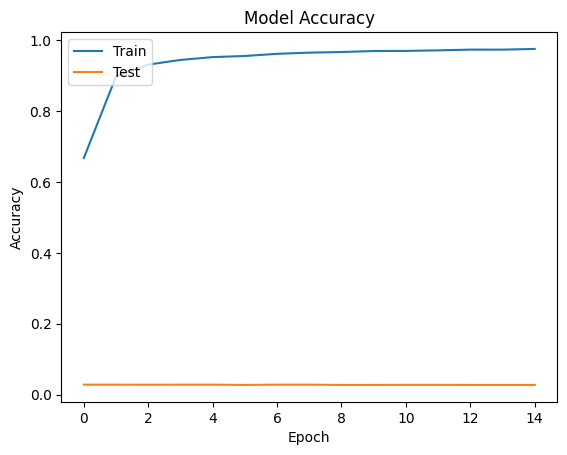

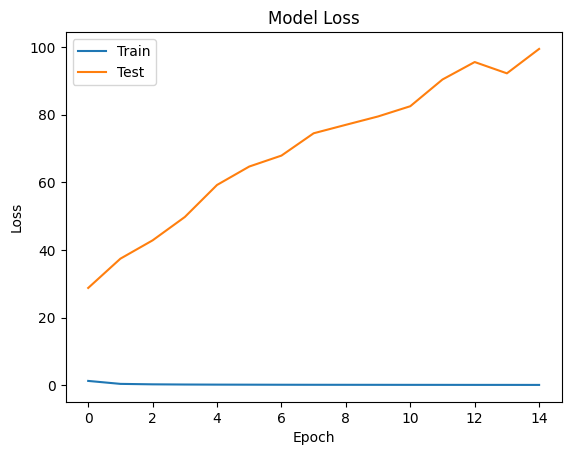

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

### Başarı Oranını Arttırmak İçin

In [19]:
model = Sequential()  # Yeni bir Sequential modeli oluşturuyoruz.

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(41, 41, 3)))  
# 32 filtreli 3x3 boyutunda bir Convolutional Layer ekliyoruz. Aktivasyon fonksiyonu olarak ReLU kullanıyoruz.
# İlk katman olduğu için input_shape, giriş boyutunu belirtmek için kullanılıyor.

model.add(Conv2D(64, (3, 3), activation='relu'))  
# 64 filtreli 3x3 boyutunda bir Convolutional Layer daha ekliyoruz. Aktivasyon fonksiyonu olarak ReLU kullanıyoruz.

model.add(MaxPooling2D(pool_size=(2, 2)))  
# 2x2 boyutunda Max Pooling işlemi uyguluyoruz. CNN'in boyutunu azaltmak için kullanılır.

model.add(Flatten())  
# Gelen çıktıyı düzleştiriyoruz, yani tek boyutlu hale getiriyoruz.

model.add(Dense(100, activation='relu'))  
# 100 nörona sahip tam bağlantılı (fully connected) bir katman ekliyoruz. Aktivasyon fonksiyonu olarak ReLU kullanıyoruz.

model.add(Dense(75, activation='relu'))  
# 75 nörona sahip başka bir tam bağlantılı katman ekliyoruz. Aktivasyon fonksiyonu olarak ReLU kullanıyoruz.

model.add(Dense(43, activation='softmax'))  
# 43 nörona sahip son tam bağlantılı katmanı ekliyoruz. Aktivasyon fonksiyonu olarak softmax kullanıyoruz.
# Çünkü bu model, 43 farklı sınıfın olasılıklarını tahmin etmek için kullanılacak.

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
# Modeli derliyoruz. Kayıp fonksiyonu olarak Sparse Categorical Crossentropy kullanıyoruz. from_logits=True, çıkışların logit değerler olduğunu belirtir.
# Optimizasyon algoritması olarak Adam kullanıyoruz ve doğruluk metriğini kullanarak modeli değerlendireceğiz.

In [20]:
history=model.fit(rtrain_images,rtrain_labels,batch_size = 144,epochs=5,verbose= 1,validation_data=(rtest_images,rtest_labels))


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


273/273 [==============================] - 122s 443ms/step - loss: 1.1010 - accuracy: 0.7123 - val_loss: 0.6149 - val_accuracy: 0.8541
Epoch 2/5
273/273 [==============================] - 121s 445ms/step - loss: 0.1807 - accuracy: 0.9543 - val_loss: 0.5282 - val_accuracy: 0.8862
Epoch 3/5
273/273 [==============================] - 119s 436ms/step - loss: 0.1009 - accuracy: 0.9739 - val_loss: 0.4974 - val_accuracy: 0.9020
Epoch 4/5
273/273 [==============================] - 117s 427ms/step - loss: 0.0568 - accuracy: 0.9853 - val_loss: 0.4353 - val_accuracy: 0.9132
Epoch 5/5
273/273 [==============================] - 116s 424ms/step - loss: 0.0409 - accuracy: 0.9889 - val_loss: 0.5160 - val_accuracy: 0.9053


In [21]:
_,accuracy=model.evaluate(rtest_images,rtest_labels)
print('Accuracy=%2f'%(accuracy*100))

395/395 [==============================] - 10s 24ms/step - loss: 0.5160 - accuracy: 0.9053
Accuracy=90.530485


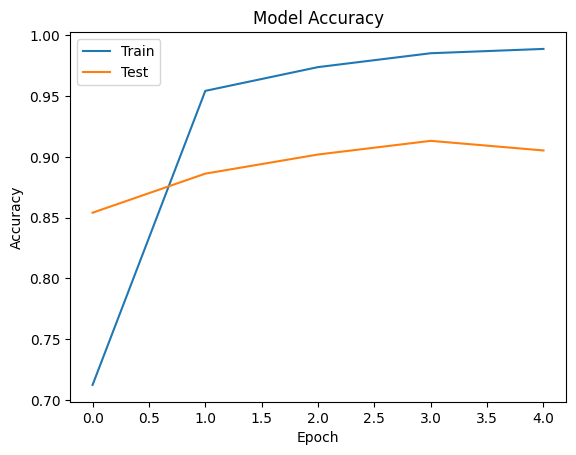

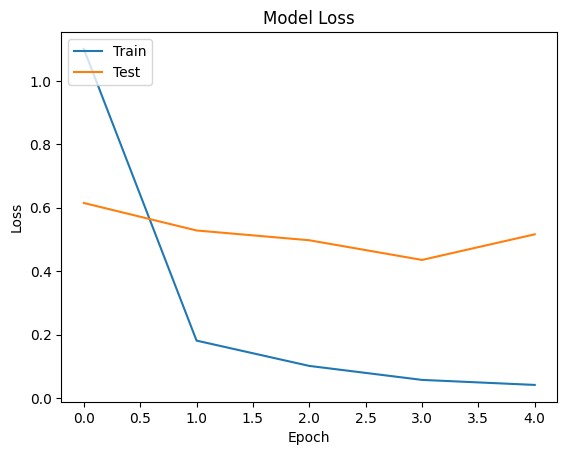

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [23]:
model.save("traffic.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#model yükleme için
#from tensorflow import keras

#model = keras.models.load_model('traffic.h5')